5. 삼성 전자 주식 다음달 가격 얼마일까? (회귀)
6. 비트코인 다음 달 어떻게 될까? (회귀)
7. 전날 비트 코인 상승하면 다음날 주가와이 상관관계

1. 목표 설정
    1. Y(출력): 미래 30일의 국내 특정 주식과 비트코인의 종가
    1. X(입력) : 최근 60일간의 데이터
        1. step : 하루 간격
        1. 양 : 1 년(2018년 6월 ~ 2019년 6월)
2. 데이터 획득
    1. 국내 기업 1개, 비트 코인
3. 데이터 정제
    1. 누락
4. 데이터 전처리
    1. 특수기호, 문자 > 수치 변환
    1. 두 데이터 날짜 기준으로 통합(axis=1(좌우로))
        1. 외국(2018-01-01), 국내(2018.1.1), (18.1.1)
        1. 날짜 포맷을 (YYYY-MM-DD)으로 변환 후 통합
1. 비트코인 가격 변화와 주가와이 상관관계(correlation)
    1. cov()
5. 입력X/출력 Y 분리
    1. m개의 x,y 쌍
    1. x(m, 60, 15) (국내증시컬럼 + 비트코인컬럼) > reshape > (m, 60 * 15)
    2. y(m, 30, 1) == (m, 30 * 2)
6. 학습용/검증용(test) 분리
    1. 섞으면 안되므로 직접 분리
    1. 가장 과거의 데이터 10%를 검증용으로 사용
7. 모델 선정
    1. Ridge 모델, 학습용 데이터로 학습
    1. 성능 측정
8. 그래프로 시각화
    1. 과거
    1. 미래의 예측( x(1, 60 * 15) > return > y_hat(1, 30 * 2)
        1. 미래 예측(1, 30 * 2) > (30,2) 국내(30), 비트코인(30) >  그래프로 그리기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
#주소중간에 _day 가 추가됩니다
samsung_url='https://finance.naver.com/item/sise_day.nhn?code=005930'

In [29]:
tables = pd.read_html(samsung_url+'&page='+str(1))
len(tables)
samsung = tables[0]
samsung.shape

(15, 7)

In [30]:
samsungs = []
for i in range(1, 28):
    tables = pd.read_html(samsung_url+'&page='+str(i))
    samsung = tables[0]
    samsungs.append(samsung)
len(samsungs)

27

In [31]:

samsung = pd.concat(samsungs, axis=0)
samsung.shape

(405, 7)

In [34]:
samsung.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.07.03,45700.0,550.0,45750.0,46350.0,45600.0,3743794.0
2,2019.07.02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
3,2019.07.01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
4,2019.06.28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0


In [15]:
# 몇번 째 테이블이 일일데이터일까 찾기
for t in tables:
    print(t.shape)


(15, 7)
(1, 12)


In [16]:
samsung.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.07.03,45650.0,600.0,45750.0,46350.0,45600.0,3627894.0
2,2019.07.02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
3,2019.07.01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
4,2019.06.28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0


In [17]:
samsung.set_index('날짜') # 날짜 컬럼을 인덱스로

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019.07.03,45650.0,600.0,45750.0,46350.0,45600.0,3627894.0
2019.07.02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
2019.07.01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
2019.06.28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0
2019.06.27,46500.0,800.0,46000.0,46600.0,45750.0,12603534.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
bitcoin_url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20180601&end=20190601'
tables = pd.read_html(bitcoin_url)
len(tables)

bitcoin = tables[0]
len(tables)

2

두 데이터 날짜 기준으로 통합(axis=1)
- 외국(2018-01-01), 국내(2018.1.1),(18.1.1)
- 날짜 포맷을 (YYYY-MM-DD) 으로 변환 후 통합

In [35]:
# 날짜를 인덱스로
samsung = samsung.set_index('날짜')

In [36]:
bitcoin = bitcoin.set_index('Date')

In [37]:
samsung.index

Index([         nan, '2019.07.03', '2019.07.02', '2019.07.01', '2019.06.28',
       '2019.06.27',          nan,          nan,          nan, '2019.06.26',
       ...
       '2018.06.04',          nan,          nan,          nan, '2018.06.01',
       '2018.05.31', '2018.05.30', '2018.05.29', '2018.05.28',          nan],
      dtype='object', name='날짜', length=405)

In [38]:
bitcoin.index

Index(['Jun 01, 2019', 'May 31, 2019', 'May 30, 2019', 'May 29, 2019',
       'May 28, 2019', 'May 27, 2019', 'May 26, 2019', 'May 25, 2019',
       'May 24, 2019', 'May 23, 2019',
       ...
       'Jun 10, 2018', 'Jun 09, 2018', 'Jun 08, 2018', 'Jun 07, 2018',
       'Jun 06, 2018', 'Jun 05, 2018', 'Jun 04, 2018', 'Jun 03, 2018',
       'Jun 02, 2018', 'Jun 01, 2018'],
      dtype='object', name='Date', length=366)

In [41]:
#두 데이터  인덱스 형식이 맞지 않음
pd.to_datetime(bitcoin.index) # 비트토인 인덱스를 날짜로 바꾸기

DatetimeIndex(['2019-06-01', '2019-05-31', '2019-05-30', '2019-05-29',
               '2019-05-28', '2019-05-27', '2019-05-26', '2019-05-25',
               '2019-05-24', '2019-05-23',
               ...
               '2018-06-10', '2018-06-09', '2018-06-08', '2018-06-07',
               '2018-06-06', '2018-06-05', '2018-06-04', '2018-06-03',
               '2018-06-02', '2018-06-01'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [42]:
pd.to_datetime(samsung.index) # 삼성 인덱스를 날짜로 바꾸기

DatetimeIndex([       'NaT', '2019-07-03', '2019-07-02', '2019-07-01',
               '2019-06-28', '2019-06-27',        'NaT',        'NaT',
                      'NaT', '2019-06-26',
               ...
               '2018-06-04',        'NaT',        'NaT',        'NaT',
               '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
               '2018-05-28',        'NaT'],
              dtype='datetime64[ns]', name='날짜', length=405, freq=None)

In [44]:
# 인덱스 타입을 날짜 타입으로 변환, 두번 실행 X
bitcoin.index = pd.to_datetime(bitcoin.index) # 삼성 인덱스를 날짜로 바꾸기
samsung.index = pd.to_datetime(samsung.index) # 삼성 인덱스를 날짜로 바꾸기

In [45]:
bitcoin.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2019-06-01,8573.84,8625.60,8481.58,8564.02,22488303544,151890214310
2019-05-31,8320.29,8586.66,8172.55,8574.50,25365190957,152059886414
2019-05-30,8661.76,9008.31,8221.27,8319.47,29246528551,147525141134
2019-05-29,8718.59,8755.85,8482.73,8659.49,23473479966,153537047655
2019-05-28,8802.76,8807.02,8634.72,8719.96,24226919267,154590202287


In [46]:
samsung.head()

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,45700.0,550.0,45750.0,46350.0,45600.0,3743794.0
2019-07-02,46250.0,350.0,46200.0,46900.0,45850.0,8463073.0
2019-07-01,46600.0,400.0,47350.0,47400.0,46250.0,11383522.0
2019-06-28,47000.0,500.0,47000.0,47000.0,46700.0,12949231.0


In [49]:
df  = pd.concat((samsung, bitcoin), axis=1).dropna() # 인덱스 기준으로 합치기
df.shape

(244, 12)

In [51]:
df.dtypes # 타입 확인, 변환 필요없음

종가            float64
전일비           float64
시가            float64
고가            float64
저가            float64
거래량           float64
Open*         float64
High          float64
Low           float64
Close**       float64
Volume        float64
Market Cap    float64
dtype: object

In [53]:
df.sum() # 누락 데이터 확인, 누락값 있으면 sum이 안됨

종가            1.086810e+07
전일비           1.280000e+05
시가            1.086810e+07
고가            1.097580e+07
저가            1.075555e+07
거래량           2.750724e+09
Open*         1.366062e+06
High          1.392758e+06
Low           1.339061e+06
Close**       1.365799e+06
Volume        1.973326e+12
Market Cap    2.374280e+13
dtype: float64

In [57]:
df.isna().sum().sum() # nulll 이 있는지 확인 isna()

0

In [54]:
df.describe() # 수치 데이터 면서 누락이 없음

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,244.000000,244.000000,244.000000,244.000000,2.440000e+02,2.440000e+02
mean,44541.393443,524.590164,44541.393443,44982.786885,44080.122951,1.127346e+07,5598.614672,5708.022869,5487.953197,5597.538361,8.087400e+09,9.730654e+10
std,2616.501077,445.496251,2663.568359,2616.332608,2605.084532,3.923683e+06,1514.608753,1542.730010,1476.931675,1512.541132,6.225952e+09,2.597773e+10
min,37450.000000,0.000000,37450.000000,37600.000000,36850.000000,4.762460e+06,3253.120000,3329.560000,3206.540000,3242.480000,3.230550e+09,5.649438e+10
25%,43012.500000,200.000000,43012.500000,43437.500000,42400.000000,8.298381e+06,3957.602500,4031.850000,3899.502500,3956.197500,4.324805e+09,6.936442e+10
50%,44975.000000,400.000000,44925.000000,45500.000000,44500.000000,1.079669e+07,6205.425000,6300.355000,6029.725000,6179.620000,5.304537e+09,1.064328e+11
75%,46362.500000,762.500000,46462.500000,46850.000000,46000.000000,1.305694e+07,6599.830000,6743.025000,6498.092500,6601.707500,9.347169e+09,1.140496e+11
max,51300.000000,2200.000000,51800.000000,51800.000000,50700.000000,2.625465e+07,8802.760000,9008.310000,8668.700000,8805.780000,3.316720e+10,1.560938e+11


In [59]:
df.cov() # 상관관계 확인 

,종가,전일비,시가,고가,저가,거래량,Open*,High,Low,Close**,Volume,Market Cap
종가,6.846078e+06,-1.755498e+04,6.807220e+06,6.780417e+06,6.748902e+06,-1.768174e+09,1.509873e+06,1.509372e+06,1.519761e+06,1.530810e+06,-1.766514e+12,2.530176e+13
전일비,-1.755498e+04,1.984669e+05,-1.146445e+04,2.638181e+04,-4.971497e+04,8.561799e+08,-1.569126e+04,-2.158713e+04,-1.742792e+04,-2.561715e+04,-1.813583e+11,-4.628508e+11
시가,6.807220e+06,-1.146445e+04,7.094596e+06,6.898380e+06,6.874931e+06,-1.543646e+09,1.544614e+06,1.544355e+06,1.547371e+06,1.560183e+06,-1.646136e+12,2.579749e+13
고가,6.780417e+06,2.638181e+04,6.898380e+06,6.845196e+06,6.757650e+06,-1.307755e+09,1.532320e+06,1.531849e+06,1.541699e+06,1.551951e+06,-1.657222e+12,2.567207e+13
저가,6.748902e+06,-4.971497e+04,6.874931e+06,6.757650e+06,6.786465e+06,-1.902252e+09,1.518191e+06,1.521359e+06,1.524395e+06,1.540312e+06,-1.758229e+12,2.544846e+13
거래량,-1.768174e+09,8.561799e+08,-1.543646e+09,-1.307755e+09,-1.902252e+09,1.539529e+13,-6.895658e+08,-7.620610e+08,-6.713624e+08,-7.452021e+08,8.860541e+14,-1.248894e+16
Open*,1.509873e+06,-1.569126e+04,1.544614e+06,1.532320e+06,1.518191e+06,-6.895658e+08,2.294040e+06,2.326722e+06,2.226557e+06,2.271367e+06,1.577697e+12,3.895097e+13
High,1.509372e+06,-2.158713e+04,1.544355e+06,1.531849e+06,1.521359e+06,-7.620610e+08,2.326722e+06,2.380016e+06,2.264298e+06,2.324452e+06,1.850203e+12,3.988235e+13
Low,1.519761e+06,-1.742792e+04,1.547371e+06,1.541699e+06,1.524395e+06,-6.713624e+08,2.226557e+06,2.264298e+06,2.181327e+06,2.226544e+06,1.453797e+12,3.818191e+13
Close**,1.530810e+06,-2.561715e+04,1.560183e+06,1.551951e+06,1.540312e+06,-7.452021e+08,2.271367e+06,2.324452e+06,2.226544e+06,2.287781e+06,1.706507e+12,3.925147e+13


전날 비트 코인 상승하면 다음날 자가와의 상관관계

In [76]:
비트코인변화 = df['Open*'] - df['Close**']
주가변화 = df['시가'] - df['종가']
과거비트코인변화 = 비트코인변화.iloc[:-1]
다음날주가변화 = 주가변화.iloc[1:]

비트코인변화.shape
주가변화.shape

(244,)

In [81]:
#상관관계가 0에 가까우므로 둘은 상관관계가 없다 ->0.07316871
np.corrcoef(과거비트코인변화, 다음날주가변화)

array([[ 1.        , -0.07316871],
       [-0.07316871,  1.        ]])

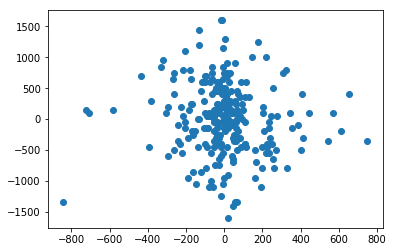

In [69]:
plt.scatter(과거비트코인변화, 다음날주가변화)
# x축(비트코인 변화량), y축(주가 변화량)

6. 입력X /출력Y 분리
    - m개의 x,y 쌍
    - x(m, 60, 15) (국내증시컬럼 + 비트코인컬럼) > reshape > (m, 60*15)
    - y(m, 30, 2) > (m, 30 * 2) 

In [83]:
len(df)
input_seq = 60
output_seq = 30
m = len(df) - (input_seq + output_seq) + 1
len(df), m

(244, 155)

In [137]:
#df = df/ df.sum() # max 정규화
df = (df - df.min()) / (df.max()-df.min()) #min_max 정규화
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['종가', 'Close**']]
    x_list.append(x)
    y_list.append(y)

In [138]:
len(x_list), type(x_list) # (155, 60, 12)
#numpy 배열로 변환
x_3d = np.stack(x_list, axis=0)
y_3d = np.stack(y_list, axis=0)

x_3d.shape, y_3d.shape

((155, 60, 12), (155, 30, 2))

In [139]:
korea_close_index = 0
bitcoin_close_index = 9

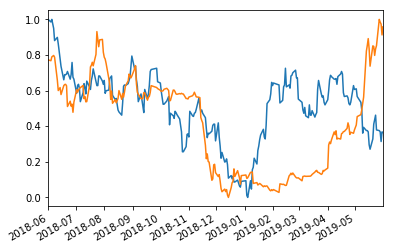

In [140]:
df['종가'].plot()
df['Close**'].plot()

7. 학습용/검증용(test) 분리
    - 섞으면 안되므로 직접 분리
    - 가장 과거의 데이터 10% 를 검증용으로 사용

In [158]:
test_ratio = 0.1
len(x_3d)
test_m = int( len(x_3d) * test_ratio )

x_3d.shape

(155, 60, 12)

In [160]:
m = len(x_3d)
x_2d = np.reshape(x_3d, [m, -1])
y_2d = np.reshape(y_3d, [m, -1])

x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]
test_m
x_2d.shape

(155, 720)

In [143]:
#model, Linear Regression , 가중치를 작게 제약시킨다 > 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge, Lasso
model = Ridge(normalize=True, solver='lsqr').fit(x_train, y_train) # 2차원 이하만 가능

In [148]:
model.score(x_train, y_train), model.score(x_test, y_test) #과적합 발생

(0.9767361862972054, -14.854996557273719)

In [166]:
#가장 최근 데이터
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent), [1, -1])
recent.shape
input_seq

60

In [164]:
p = model.predict(recent)#미래 예측
p = np.reshape(p, [output_seq, -1])
p.shape
# output_seq

30

array([0.82846606, 0.83686755, 0.80535445, 0.74785701, 0.70322264,
       0.65517003, 0.68295159, 0.74717617, 0.77644706, 0.82169161,
       0.82342871, 0.79052933, 0.78019502, 0.71785633, 0.68633352,
       0.69877174, 0.67496745, 0.64249303, 0.5562043 , 0.45246021,
       0.38502142, 0.41042091, 0.42164824, 0.43112005, 0.39601188,
       0.35215686, 0.33439696, 0.27436681, 0.2375275 , 0.18932426])

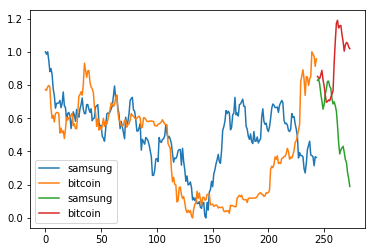

In [165]:
xm = len(df)
plt.plot(np.arange(xm), df['종가'].values, label='samsung')
plt.plot(np.arange(xm), df['Close**'].values, label='bitcoin')
plt.plot(np.arange(xm,xm+output_seq), p[:, 0], label='samsung')
plt.plot(np.arange(xm,xm+output_seq), p[:, 1], label='bitcoin')
plt.legend()

p[:, 0]